Importar las librerias

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [170]:
!git clone "https://github.com/YonLLL/Proyecto"

fatal: destination path 'Proyecto' already exists and is not an empty directory.


Nombre de los arcivos y las rondas

In [171]:
filenames = ['01 R-7.xlsx', '04 R-9.xlsx', '07 R-9.xlsx', '10 R-8.xlsx', '13 R-5.xlsx',
             '02 R-6.xlsx', '05 R-9.xlsx', '08 R-5.xlsx', '11 R-9.xlsx', '14 R-9.xlsx',
             '03 R-7.xlsx', '06 R-9.xlsx', '09 R-9.xlsx', '12 R-7.xlsx']
rounds = [int(f.split(" ")[1].split(".")[0].split("-")[1]) for f in filenames]


Leer archivos y guardar en una lista de dataframes

In [172]:
df = [pd.DataFrame(pd.read_excel("/content/Proyecto/"+f, header=4)) for f in filenames]
for i in range(len(df)):
  print(df[i][["FIDE","K","Var."]])

      FIDE     K  Var.
0   1932.0  20.0 -38.8
1   1892.0  40.0  38.0
2   1863.0  20.0  -3.0
3   1831.0  20.0  -6.2
4   1763.0  20.0  -2.0
5   1679.0  20.0 -27.2
6   1643.0  20.0 -18.4
7   1611.0  20.0  34.8
8   1499.0  20.0  -5.6
9   1434.0  20.0  13.8
10  1431.0  20.0 -10.0
11  1429.0  40.0  96.8
12  1407.0  20.0   2.0
13  1364.0  20.0  -4.0
14  1282.0  20.0   2.2
15  1234.0  40.0  20.0
16  1191.0  20.0  18.4
17  1141.0  40.0 -20.4
18  1130.0  40.0   2.4
19  1102.0  40.0 -11.6
20  1076.0  40.0  -9.6
21  1029.0  20.0 -12.2
22  1009.0  40.0  -3.2
23     0.0  40.0   0.0
24     0.0  40.0   0.0
25     0.0  40.0   0.0
26     0.0  40.0   0.0
27     0.0  40.0   0.0
28     0.0  40.0   0.0
29     0.0  40.0   0.0
30     0.0  40.0   0.0
31     0.0  40.0   0.0
32     0.0  40.0   0.0
33     0.0  40.0   0.0
34     0.0  40.0   0.0
35     0.0  40.0   0.0
36     0.0  40.0   0.0
37     0.0  40.0   0.0
38     0.0  40.0   0.0
39     0.0  40.0   0.0
40     0.0  40.0   0.0
41     0.0  40.0   0.0
42     0.0 

Limpieza de datos

In [173]:
for i in range(len(df)):
    df[i] = df[i][df[i]['FIDE'].notna()]
    df[i].dropna(subset=["FIDE", "Var."])
   #df[i] = df[i][df[i]['FIDE'] > 0]  # Filtro para eliminar valores de ELO<=0

In [174]:
for i in range(len(df)):
  print(df[i][["FIDE","K","Var."]])

      FIDE     K  Var.
0   1932.0  20.0 -38.8
1   1892.0  40.0  38.0
2   1863.0  20.0  -3.0
3   1831.0  20.0  -6.2
4   1763.0  20.0  -2.0
5   1679.0  20.0 -27.2
6   1643.0  20.0 -18.4
7   1611.0  20.0  34.8
8   1499.0  20.0  -5.6
9   1434.0  20.0  13.8
10  1431.0  20.0 -10.0
11  1429.0  40.0  96.8
12  1407.0  20.0   2.0
13  1364.0  20.0  -4.0
14  1282.0  20.0   2.2
15  1234.0  40.0  20.0
16  1191.0  20.0  18.4
17  1141.0  40.0 -20.4
18  1130.0  40.0   2.4
19  1102.0  40.0 -11.6
20  1076.0  40.0  -9.6
21  1029.0  20.0 -12.2
22  1009.0  40.0  -3.2
23     0.0  40.0   0.0
24     0.0  40.0   0.0
25     0.0  40.0   0.0
26     0.0  40.0   0.0
27     0.0  40.0   0.0
28     0.0  40.0   0.0
29     0.0  40.0   0.0
30     0.0  40.0   0.0
31     0.0  40.0   0.0
32     0.0  40.0   0.0
33     0.0  40.0   0.0
34     0.0  40.0   0.0
35     0.0  40.0   0.0
36     0.0  40.0   0.0
37     0.0  40.0   0.0
38     0.0  40.0   0.0
39     0.0  40.0   0.0
40     0.0  40.0   0.0
41     0.0  40.0   0.0
42     0.0 

Desarrollo del modelo

In [175]:
data_x = []
data_y = []
for i, d in enumerate(df):
    fide_std = d["FIDE"].std()
    fide_median = d["FIDE"].median()
    length = len(d["FIDE"])
    if fide_std >= 0 and fide_median >= 0 and length > 10:
        k_mask = d["K"].isin([10, 20, 40])
        for _, row in d[k_mask].iterrows():
            elo_init = row["FIDE"]
            data_x.append([elo_init, rounds[i], fide_median, row["K"]])
            data_y.append(row["Var."])

Escoger los datos de entrenamiento y de prueba

In [176]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1)

Entrenamiento

In [177]:
alg = MLPRegressor(hidden_layer_sizes=100)
alg.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=100)

In [178]:
print("Error medio absoluto (Entrenamiento):")
print(mean_absolute_error(y_train, alg.predict(x_train)))
print("Error medio absoluto (Prueba):")
print(mean_absolute_error(y_test, alg.predict(x_test)))

Error medio absoluto (Entrenamiento):
25.239715962630292
Error medio absoluto (Prueba):
21.37553492100883


Calcular intervalos para ver la eficiencia en rangos

In [179]:
intervalo = list(range(1000,3000, 200))

def calcular_error_intervalos(x, y, intervalo):
  data_x_train = [[] for i in range(len(intervalo)-1)]
  data_y_train = [[] for i in range(len(intervalo)-1)]
  for i in range(len(x)):
    for A in range(len(intervalo)-1):
      if x[i][0]>intervalo[A] and x[i][0]<intervalo[A+1]:
        data_x_train[A].append(x[i])
        data_y_train[A].append(y[i])
  resultados = []
  for i in range(len(data_x_train)):
    if len(data_x_train[i])>0:
      resultados.append((intervalo[i], intervalo[i+1], mean_absolute_error(data_y_train[i], alg.predict(data_x_train[i])), len(data_x_train[i])))
  return resultados

Visualización de los resultados

In [180]:
resultados_entrenamiento = calcular_error_intervalos(x_train, y_train, intervalo)
resultados_prueba = calcular_error_intervalos(x_test, y_test, intervalo)

print()

print("Entrenamiento:")

for inicio, fin, error, tamaño in resultados_entrenamiento:
  print(f"{inicio} - {fin}: {error} ({tamaño})")

print("Prueba:")
for inicio, fin, error, tamaño in resultados_prueba:
  print(f"{inicio} - {fin}: {error} ({tamaño})")


Entrenamiento:
1000 - 1200: 29.90276497483514 (49)
1200 - 1400: 31.17604794593968 (81)
1400 - 1600: 37.570723927245666 (142)
1600 - 1800: 28.511099389338973 (155)
1800 - 2000: 25.464667258321835 (166)
2000 - 2200: 26.64573791474765 (97)
2200 - 2400: 20.53855476485299 (46)
2400 - 2600: 20.509302162441703 (8)
Prueba:
1000 - 1200: 21.940498829265994 (10)
1200 - 1400: 32.398660910617 (11)
1400 - 1600: 27.565636857675198 (11)
1600 - 1800: 23.893002745878874 (17)
1800 - 2000: 25.21679586982173 (19)
2000 - 2200: 21.59137134909226 (12)
2200 - 2400: 14.436740572982025 (2)


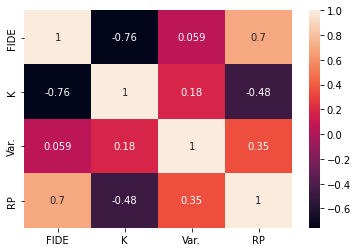

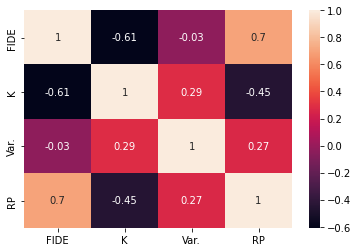

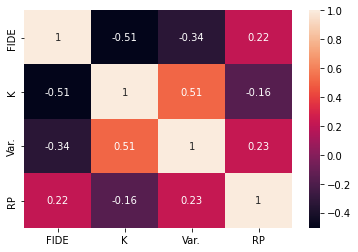

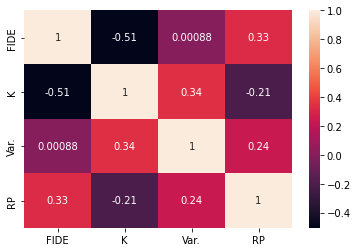

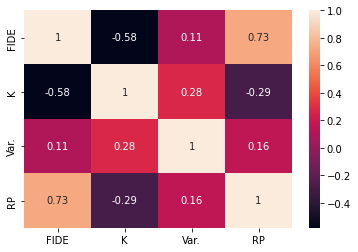

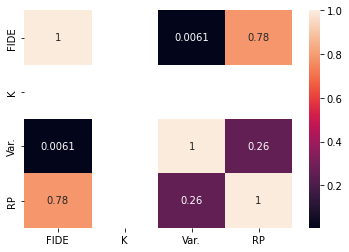

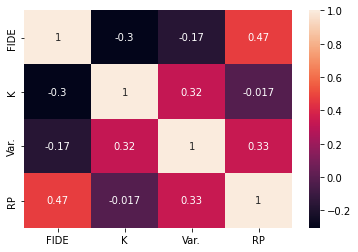

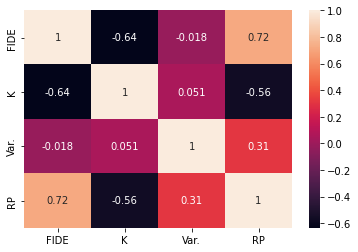

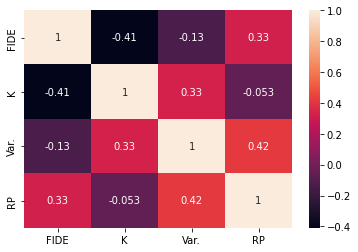

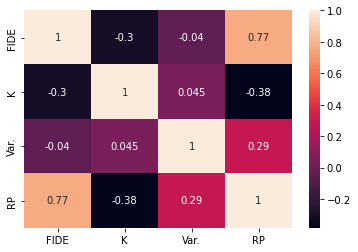

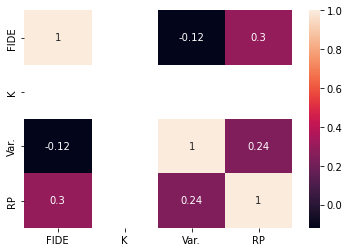

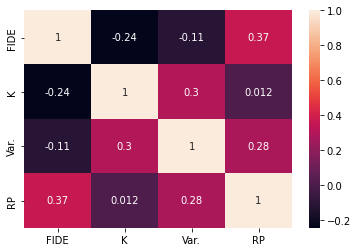

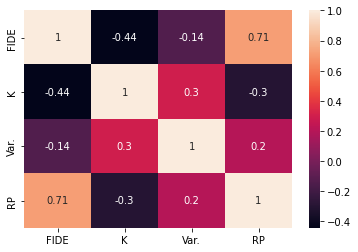

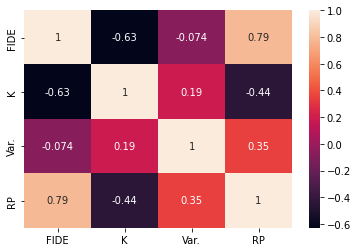

In [181]:
for i in range(len(df)):
  df_small = df[i].loc[:,["FIDE","K","Var.","RP"]]
  correlation_mat = df_small.corr()
  sns.heatmap(correlation_mat, annot = True)
  plt.show()